In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname("./Untitled.ipynb"), '..')))
import numpy as np
from src.bopf.bopf import BagOfPatternFeature
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

c:\programdata\miniconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\programdata\miniconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
c:\programdata\miniconda3\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
bopf = BagOfPatternFeature()

In [3]:
%%time
path = "D:/tesis/plasticc-dataset/"
bopf.load_dataset(path, fmt="pandas", data_filename="training_set.csv.zip", meta_filename="training_set_metadata.csv")

Wall time: 2.5 s


In [4]:
dataset_tuple = []
for t, y in zip(bopf.times, bopf.dataset):
    dataset_tuple.append((t, y))

In [5]:
x_train, x_test, y_train, y_test = train_test_split(dataset_tuple, bopf.labels,
                                                    test_size=0.8,
                                                    random_state=0,
                                                    stratify=bopf.labels)

In [6]:
dataset_split = []
times_split = []
for d_tuple in x_train:
    times_split.append(d_tuple[0])
    dataset_split.append(d_tuple[1])
bopf.times = times_split
bopf.dataset = dataset_split
bopf.labels = y_train
bopf.m = len(y_train)

(array([  0.    ,  52.0692,  89.0059, 117.9589, 298.2444, 299.2313,
        302.2522, 307.214 , 367.0063, 369.0906, 384.0704, 384.9401,
        407.0731, 424.9198, 636.2616, 662.1928, 741.0079, 743.9945,
        748.9846, 778.9008, 779.892 ]),
 array([-46.516376, -31.217152,   5.277518,  53.555435, -13.740895,
         62.813354,  25.039074,  55.830353,  57.1273  ,  56.240952,
        -36.006386,  75.502884, -15.59936 ,  14.332279,  95.472527,
         83.867554,  27.633608, -29.608046,   1.588219,  25.008795,
         74.112045]))

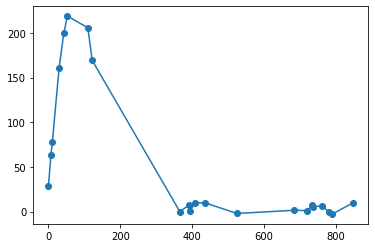

In [7]:
n = 55
plt.plot(bopf.times[n], bopf.dataset[n], "-o")
d_tuple

In [8]:
%%time
bopf.cumsum()

Wall time: 69.3 ms


In [11]:
%%time
bopf.bop(7, 0.5, tol=3)

TOTAL DE SEGMENTOS VACIOS:  69736
Wall time: 533 ms


In [12]:
%%time
bopf.adjust_label_set()

Wall time: 5.86 ms


In [13]:
bopf.bopsize

65536

In [14]:
%%time
bopf.anova()

Wall time: 3min 38s


In [15]:
%%time
bopf.anova_sort()

Wall time: 2.93 ms


In [16]:
%%time
bopf.sort_trim_arr()

Wall time: 1min 17s


In [17]:
bopf.sort_index

array([ 8221,  4359, 17410, ..., 43683, 43682,     0], dtype=int64)

In [18]:
bopf.fea_num

3059

In [19]:
# bopf.train_bop_sort = bopf.train_bop
# bopf.fea_num = bopf.bopsize

In [20]:
%%time
bopf.crossVL()

Wall time: 1min 43s


In [21]:
bopf.best_idx, bopf.best_score

(1757, 0.26577437858508607)

In [22]:
%%time
crossL2 = bopf.crossVL2()

D:\tesis\tesis\src\bopf\bopf.py:342: RuntimeWarning: invalid value encountered in double_scalars
  r = r1*r1 / (r2*r3)


Wall time: 4min 10s


In [23]:
bopf.best2_idx, bopf.best2_score

(2361, 0.7718291905672403)

# Full process

### Basic idea:
1. Get **all** sub-sequences of same time width from time series.
2. Transform each sub-sequence to a SAX word applying **numerosity reduction** and using **special character for empty segments**.
3. Generate a **Bag-of-Pattern representation** of the time series using **all sub-sequences**
4. compute **ANOVA F Test** for discriminating the best features from Bag-of-Pattern representation and drop the rest.
5. compute centroid class features and tf-idf class features for each class on bag-of-patter representation.
6. Use **cross validation leave-one-out** while testing different parameters combinations and find the top 10 parameter combinations. The validation is performed on classification using centroid or tf-idf
7. Classify test set using the best 10 parameters combinations.

### comments:
- ANOVA F process is very expensive and needs a more efficient algorithm
- Maybe we should consider creating the sub-sequences based on number of samples instead of window time length
- For irregular time series the centroid method it seems to fail, probabily due to the variation in the time series samples which produces a variation in the Bag-of-pattern representation
- The ANOVA F process would have to be implemented in multivariate form to work on multi-band time series.
- The distances are euclidean and cosine of matrix for which multivariate methods exists.
- Should try k-fold cross validation instead of leave-one-out
- joker should be adapted for distances

In [38]:
import sys
import os
sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname("./Untitled.ipynb"), '..')))
import numpy as np
from src.bopf.bopf import BagOfPatternFeature
from sklearn.model_selection import train_test_split

In [2]:
%%time
bopf = BagOfPatternFeature()
path = "D:/tesis/plasticc-dataset/"
bopf.load_dataset(path, fmt="pandas", data_filename="training_set.csv.zip", meta_filename="training_set_metadata.csv")

dataset_tuple = []
for t, y in zip(bopf.times, bopf.dataset):
    dataset_tuple.append((t, y))
    
x_train, x_test, y_train, y_test = train_test_split(dataset_tuple, bopf.labels,
                                                    test_size=0.7,
                                                    random_state=0,
                                                    stratify=bopf.labels)
dataset_split = []
times_split = []
for d_tuple in x_train:
    times_split.append(d_tuple[0])
    dataset_split.append(d_tuple[1])
bopf.times = times_split
bopf.dataset = dataset_split
bopf.labels = y_train
bopf.m = len(y_train)
print(bopf.m)
bopf.cumsum()

2354
Wall time: 2.48 s


In [3]:
wd_arr = [3, 4, 5, 6, 7]
wd_num = len(wd_arr)
step = 0.05
wl_arr = (np.arange(int(1/step))+1)*step
wl_num = len(wl_arr)
print(wd_arr, wl_arr)

[3, 4, 5, 6, 7] [0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7
 0.75 0.8  0.85 0.9  0.95 1.  ]


In [4]:
%%time
bop_features = []
bop_fea_num = []
bop_cv_acc = []
bop_feature_index = []
bop_features2 = []
bop_fea_num2 = []
bop_cv_acc2 = []
bop_feature_index2 = []
bop_wd = []
bop_wl = []
for i in range(wd_num):
    wd = wd_arr[i]
    for j in range(wl_num):
        wl = wl_arr[j]
        bopf.bop(wd, wl)
        bopf.adjust_label_set()
        bopf.anova()
        bopf.anova_sort()
        bopf.sort_trim_arr()
        bopf.crossVL()
        
        bop_features.append(bopf.crossL[:bopf.c*bopf.best_idx])
        bop_fea_num.append(bopf.best_idx)
        bop_cv_acc.append(bopf.best_score)
        bop_feature_index.append(bopf.sort_index[:bopf.best_idx])
        
        bopf.crossVL2()
        bop_features2.append(bopf.crossL2[:bopf.c*bopf.best2_idx])
        bop_fea_num2.append(bopf.best2_idx)
        bop_cv_acc2.append(bopf.best2_score)
        bop_feature_index2.append(bopf.sort_index[:bopf.best2_idx])
        
        bop_wd.append(wd)
        bop_wl.append(wl)
        print("cross_vl_results for wl:", wl, ", wd:", wd)
        print(">>> centroid => best_fea_num:", bopf.best_idx, ", best_acc: ", bopf.best_score)
        print(">>> tf-idf => best_fea_num:", bopf.best2_idx, ", best_acc: ", bopf.best2_score)

TOTAL DE SEGMENTOS VACIOS:  19668


D:\tesis\tesis\src\bopf\bopf.py:342: RuntimeWarning: invalid value encountered in double_scalars
  r = r1*r1 / (r2*r3)


cross_vl_results for wl: 0.05 , wd: 3
>>> centroid => best_fea_num: 55 , best_acc:  0.12361937128292269
>>> tf-idf => best_fea_num: 24 , best_acc:  0.08283772302463892
TOTAL DE SEGMENTOS VACIOS:  26102
cross_vl_results for wl: 0.1 , wd: 3
>>> centroid => best_fea_num: 61 , best_acc:  0.12531860662701785
>>> tf-idf => best_fea_num: 9 , best_acc:  0.06584536958368734
TOTAL DE SEGMENTOS VACIOS:  33908
cross_vl_results for wl: 0.15000000000000002 , wd: 3
>>> centroid => best_fea_num: 2 , best_acc:  0.14443500424808836
>>> tf-idf => best_fea_num: 8 , best_acc:  0.0632965165675446
TOTAL DE SEGMENTOS VACIOS:  43853
cross_vl_results for wl: 0.2 , wd: 3
>>> centroid => best_fea_num: 60 , best_acc:  0.12446898895497026
>>> tf-idf => best_fea_num: 42 , best_acc:  0.05310110450297366
TOTAL DE SEGMENTOS VACIOS:  53920
cross_vl_results for wl: 0.25 , wd: 3
>>> centroid => best_fea_num: 61 , best_acc:  0.12489379779099405
>>> tf-idf => best_fea_num: 7 , best_acc:  0.055225148683092605
TOTAL DE SEGMEN

TOTAL DE SEGMENTOS VACIOS:  71482
cross_vl_results for wl: 0.05 , wd: 5
>>> centroid => best_fea_num: 375 , best_acc:  0.18181818181818182
>>> tf-idf => best_fea_num: 577 , best_acc:  0.21325403568394222
TOTAL DE SEGMENTOS VACIOS:  72084
cross_vl_results for wl: 0.1 , wd: 5
>>> centroid => best_fea_num: 768 , best_acc:  0.15378079864061173
>>> tf-idf => best_fea_num: 833 , best_acc:  0.25955819881053527
TOTAL DE SEGMENTOS VACIOS:  78866
cross_vl_results for wl: 0.15000000000000002 , wd: 5
>>> centroid => best_fea_num: 837 , best_acc:  0.13721325403568393
>>> tf-idf => best_fea_num: 750 , best_acc:  0.27102803738317754
TOTAL DE SEGMENTOS VACIOS:  94449
cross_vl_results for wl: 0.2 , wd: 5
>>> centroid => best_fea_num: 705 , best_acc:  0.13806287170773152
>>> tf-idf => best_fea_num: 268 , best_acc:  0.26125743415463043
TOTAL DE SEGMENTOS VACIOS:  109586
cross_vl_results for wl: 0.25 , wd: 5
>>> centroid => best_fea_num: 441 , best_acc:  0.1503823279524214
>>> tf-idf => best_fea_num: 146 

TOTAL DE SEGMENTOS VACIOS:  141386
cross_vl_results for wl: 0.05 , wd: 7
>>> centroid => best_fea_num: 2020 , best_acc:  0.18054375531011044
>>> tf-idf => best_fea_num: 3022 , best_acc:  0.381053525913339
TOTAL DE SEGMENTOS VACIOS:  125205
cross_vl_results for wl: 0.1 , wd: 7
>>> centroid => best_fea_num: 3429 , best_acc:  0.17714528462192014
>>> tf-idf => best_fea_num: 4324 , best_acc:  0.6325403568394222
TOTAL DE SEGMENTOS VACIOS:  132340
cross_vl_results for wl: 0.15000000000000002 , wd: 7
>>> centroid => best_fea_num: 4486 , best_acc:  0.1503823279524214
>>> tf-idf => best_fea_num: 3286 , best_acc:  0.7663551401869159
TOTAL DE SEGMENTOS VACIOS:  147672
cross_vl_results for wl: 0.2 , wd: 7
>>> centroid => best_fea_num: 2525 , best_acc:  0.1389124893797791
>>> tf-idf => best_fea_num: 1961 , best_acc:  0.6503823279524215
TOTAL DE SEGMENTOS VACIOS:  169559
cross_vl_results for wl: 0.25 , wd: 7
>>> centroid => best_fea_num: 1277 , best_acc:  0.15760407816482583
>>> tf-idf => best_fea_nu

In [6]:
np.save("bop_features.npy", np.array(bop_features))
np.save("bop_fea_num.npy", np.array(bop_fea_num))
np.save("bop_cv_acc.npy", np.array(bop_cv_acc))
np.save("bop_feature_index.npy", np.array(bop_feature_index))
np.save("bop_features2.npy", np.array(bop_features2))
np.save("bop_fea_num2.npy", np.array(bop_fea_num2))
np.save("bop_cv_acc2.npy", np.array(bop_cv_acc2))
np.save("bop_feature_index2.npy", np.array(bop_feature_index2))
np.save("bop_wd.npy", np.array(bop_wd))
np.save("bop_wl.npy", np.array(bop_wl))

In [8]:
index1 = np.argsort(bop_cv_acc)[::-1]
index2 = np.argsort(bop_cv_acc2)[::-1]
top_n = 10

avg_acc_sum = 0
avg_acc_sum2 = 0
for i in range(top_n):
    avg_acc_sum += bop_cv_acc[index1[i]]
    avg_acc_sum2 += bop_cv_acc2[index2[i]]
    print("centroid: ", bop_cv_acc[index1[i]], bop_wd[index1[i]], bop_wl[index1[i]])
    print("tf-idf:" , bop_cv_acc2[index2[i]], bop_wd[index2[i]], bop_wl[index2[i]])

avg_acc = avg_acc_sum / top_n
avg_acc2 = avg_acc_sum2 / top_n
print("centroid avg:", avg_acc)
print("tf-idf avg: ", avg_acc2)

centroid:  0.24851316907391674 7 0.5
tf-idf: 0.7663551401869159 7 0.15000000000000002
centroid:  0.2463891248937978 7 1.0
tf-idf: 0.7187765505522515 7 0.6000000000000001
centroid:  0.24341546304163125 7 0.9
tf-idf: 0.7149532710280374 7 0.65
centroid:  0.23789294817332202 6 0.5
tf-idf: 0.7098555649957519 7 0.55
centroid:  0.23534409515717927 7 0.55
tf-idf: 0.7090059473237044 7 0.5
centroid:  0.2336448598130841 7 0.6000000000000001
tf-idf: 0.6911639762107051 7 0.75
centroid:  0.23322005097706033 6 0.55
tf-idf: 0.6796941376380629 7 0.8
centroid:  0.23279524214103653 7 0.45
tf-idf: 0.6758708581138487 7 0.8500000000000001
centroid:  0.2306711979609176 7 0.9500000000000001
tf-idf: 0.6677994902293968 7 0.7000000000000001
centroid:  0.221750212404418 7 0.8500000000000001
tf-idf: 0.657179269328802 7 0.9
centroid avg: 0.2363636363636364
tf-idf avg:  0.6990654205607477


In [21]:
# make small test (100 samples)
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_test, y_test,
                                                    test_size=0.0181,
                                                    random_state=0,
                                                    stratify=y_test)
len(x_test2)

bopf_t = BagOfPatternFeature()

dataset_split = []
times_split = []
for d_tuple in x_test2:
    times_split.append(d_tuple[0])
    dataset_split.append(d_tuple[1])
bopf_t.times = times_split
bopf_t.dataset = dataset_split
bopf_t.labels = y_test2
bopf_t.m = len(y_test2)
print(bopf_t.m)
bopf_t.cumsum()

100


In [25]:
def sort_trim_arr(train_bop, sort_index, m, n):
    train_bop_sort = np.zeros((n+1) * m)
    idx = 0
    for j in range(n):
        k = sort_index[j]
        for i in range(m):
            train_bop_sort[idx] = train_bop[i + k * m]
            idx  += 1
    return train_bop_sort

def classify(test_bop, centroids, tlabel, mt, c, fea_num):
    res = np.zeros(mt, dtype=int)
    for i in range(mt):
        rmin = np.inf
        label = -1
        for j in range(c):
            r = 0.0
            pm = 0
            pv = 0
            for k in range(fea_num):
                pm += test_bop[i + (k)*mt]
                pv += centroids[j + (k)*c]
                d = pm - pv
                r += d*d
            
#             pm = test_bop[i]
#             pv = centroids[j]
            
            
#             for k in range(fea_num):
#                 d = pm - pv
#                 pm += test_bop[i + (k+1)*mt]
#                 pv += centroids[j+ (k+1)*c]
#                 r += d*d
            if r < rmin:
                rmin = r
                label = tlabel[j]
        res[i] = label

    return res

def classify2(test_bop, tf_idfs, tlabel, mt, c, fea_num):
    res = np.zeros(mt, dtype=int)
    for i in range(mt):
        rmin = np.inf
        label = -1
        for j in range(c):
            r1 = 0.0
            r2 = 0.0
            r3 = 0.0
            pm = 0
            pv = 0
            for k in range(fea_num):
                pm += test_bop[i + k*mt]
                pv += tf_idfs[j + (k)*c]
                d = pm
                if d > 0:
                    d = 1 + np.log10(d)
                r1 += d * pv
                r2 += d*d
                r3 += pv * pv
            r = r1 * r1 / (r2 * r3)
            if r > rmax:
                rmax = r
                label = tlabel[j]
        res[i] = label
    return res

In [37]:
for i in range(top_n):
    s_index = index1[i]
    wd = bop_wd[s_index]
    wl = bop_wl[s_index]
    bopf_t.bop(wd, wl)
    test_bop_sort = sort_trim_arr(bopf_t.train_bop, bop_feature_index[s_index], 
                                  bopf_t.m, bop_fea_num[s_index])
    predicted_label = classify(test_bop_sort, bop_features[s_index], bopf.tlabel, 
                               bopf_t.m, bopf.c, bop_fea_num[s_index])
    real_label = np.array(bopf_t.labels)
    count = 0
    for i in range(len(real_label)):
        if predicted_label[i] == real_label[i]:
            count += 1
    print("cv_acc: ", bop_cv_acc[s_index], ", wd: ", wd, ", wl:", wl, ", fea_num:", bop_fea_num[s_index])
    print("acc: ", count / len(real_label))

TOTAL DE SEGMENTOS VACIOS:  4236
cv_acc:  0.24851316907391674 , wd:  7 , wl: 0.5 , fea_num: 1742
acc:  0.05
TOTAL DE SEGMENTOS VACIOS:  289
cv_acc:  0.2463891248937978 , wd:  7 , wl: 1.0 , fea_num: 1364
acc:  0.17
TOTAL DE SEGMENTOS VACIOS:  1340
cv_acc:  0.24341546304163125 , wd:  7 , wl: 0.9 , fea_num: 1592
acc:  0.11
TOTAL DE SEGMENTOS VACIOS:  3336
cv_acc:  0.23789294817332202 , wd:  6 , wl: 0.5 , fea_num: 38
acc:  0.08
TOTAL DE SEGMENTOS VACIOS:  3448
cv_acc:  0.23534409515717927 , wd:  7 , wl: 0.55 , fea_num: 2067
acc:  0.05
TOTAL DE SEGMENTOS VACIOS:  2999
cv_acc:  0.2336448598130841 , wd:  7 , wl: 0.6000000000000001 , fea_num: 1684
acc:  0.1
TOTAL DE SEGMENTOS VACIOS:  2690
cv_acc:  0.23322005097706033 , wd:  6 , wl: 0.55 , fea_num: 52
acc:  0.16
TOTAL DE SEGMENTOS VACIOS:  5474
cv_acc:  0.23279524214103653 , wd:  7 , wl: 0.45 , fea_num: 1437
acc:  0.07
TOTAL DE SEGMENTOS VACIOS:  712
cv_acc:  0.2306711979609176 , wd:  7 , wl: 0.9500000000000001 , fea_num: 1093
acc:  0.12
TOTAL

In [26]:
for i in range(top_n):
    s_index = index2[i]
    wd = bop_wd[s_index]
    wl = bop_wl[s_index]
    bopf_t.bop(wd, wl)
    test_bop_sort = sort_trim_arr(bopf_t.train_bop, bop_feature_index2[s_index], 
                                  bopf_t.m, bop_fea_num2[s_index])
    predicted_label = classify2(test_bop_sort, bop_features2[s_index], bopf.tlabel, 
                               bopf_t.m, bopf.c, bop_fea_num2[s_index])
    real_label = np.array(bopf_t.labels)
    count = 0
    for i in range(len(real_label)):
        if predicted_label[i] == real_label[i]:
            count += 1

    print(count / len(real_label))

TOTAL DE SEGMENTOS VACIOS:  5552


IndexError: list index out of range

In [34]:
len(bop_features[0])

770